In [10]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

22
250.0


<function matplotlib.pyplot.show(close=None, block=None)>

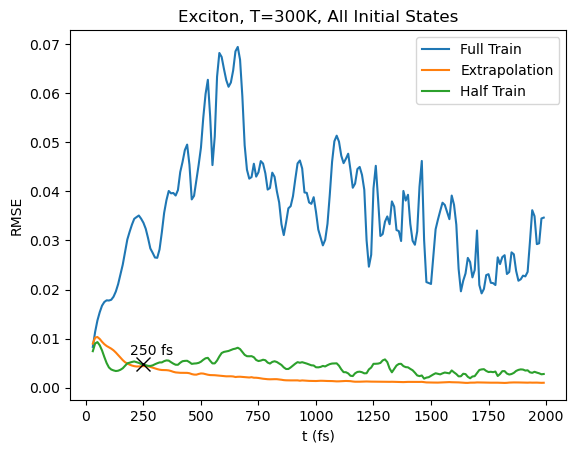

In [40]:
resid1 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid1.dat")
resid2 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid2.dat")
resid3 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid3.dat")

time = 250
index_t = np.where(resid1[:,0]==time)[0]
index_t = index_t[0]
print(index_t)


plt.plot(resid1[:,0],resid1[:,1], label = "Full Train")
plt.plot(resid2[:,0],resid2[:,1], label = "Extrapolation")
plt.plot(resid3[:,0],resid3[:,1], label = "Half Train")

plt.xlabel('t (fs)')
plt.ylabel('RMSE')
plt.legend()

# Add an 'X' marker at the point
plt.plot(resid3[index_t,0],resid3[index_t,1], marker='x', markersize=10, label='Annotated Point', color='black')
print(resid3[index_t,0])

# Add a text label
plt.text(resid3[index_t,0]-60,resid3[index_t,1]+0.002, "250 fs", fontsize=10, color='black')

plt.title("Exciton, T=300K, All Initial States")
plt.show

(9601, 7, 7)
200.0


/tmp/ipykernel_1157778/1552037198.py:40: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  line_opt, = ax.plot(times, population_1[:,i], "D", label='optimized', marker='D', markersize=3, markevery=500, color=c)


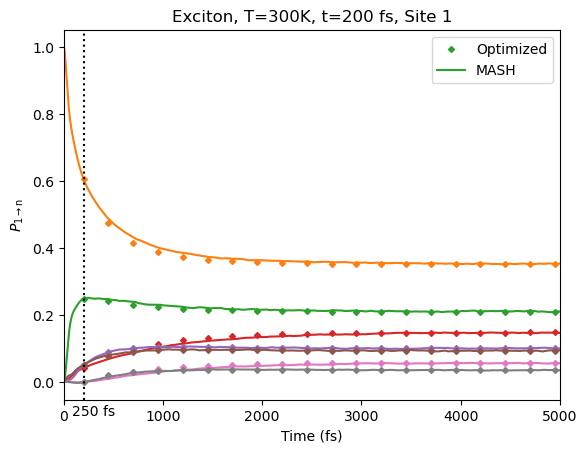

In [44]:
from optimagic_optimizer import Optimizer

kappas = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_kappas.dat")

data_path = "/u/dem/kebl6911/Part-II/MATRICES/Ct_exc.out"
data = np.loadtxt(data_path)
t = data[:,0]
Ct = data[:,1:].reshape((-1,7,7))
Ct = np.einsum("tij->tji",Ct)
peq = Ct[-1]
peq = np.mean(peq, axis=1)

optimizer = Optimizer(t, Ct, peq,7)
t1s = 10*np.arange(3,200)
index_t1s = np.where(t1s ==200)[0] 

index_full = np.where(t == 200)[0] 
times = t[index_full[0]:] # Include t = 500.
Ct0 = Ct[index_full[0]:]
Ct0 = Ct0[0]

# times_back =t[:index_full[0]+1]
# back = optimizer.predict(Ct0, times_back, "back", kappas[index_t1s[0]])
# pop_2 = back[:,:,0]

predict =optimizer.predict(Ct0, times,"forward", kappas[index_t1s[0]])
print(np.shape(predict))
population_1 = predict[:,:,0]
print(times[0])

fig, ax = plt.subplots()
# Create empty lists to store handles for legend
handles = []
labels = []

for i in range(7):
    x = i + 1
    c = "C%x"%x
    line_mash, = ax.plot(t, Ct[:,i,0], label='MASH', color=c)
    line_opt, = ax.plot(times, population_1[:,i], "D", label='optimized', marker='D', markersize=3, markevery=500, color=c)

    if i == 1:
        handles.extend([line_opt, line_mash])
        labels.extend(['Optimized', 'MASH'])

# Create legends using handles and labels
l = ax.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

plt.axvline(times[0], linestyle=':', color="black")
plt.text(times[0]-120, -0.11, '250 fs', va='bottom', ha='left')

plt.xlim(0,5000)
plt.xlabel("Time (fs)")
plt.ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
plt.title("Exciton, T=300K, t=200 fs, Site 1")
plt.show()


In [13]:
# from optimagic_optimizer import Optimizer
# kappa_exc_300 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_kappas.dat")
# heom_exc_300 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/Ct_exc.out")

#resid1 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid1.dat")
resid2 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid2.dat")
resid3 = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_resid3.dat")

time = 250
index_t = np.where(resid1[:,0]==time)[0]
index_t = index_t[0]
print(index_t)


plt.plot(resid1[:,0],resid1[:,1], label = "Full Train")
plt.plot(resid2[:,0],resid2[:,1], label = "Extrapolation")
plt.plot(resid3[:,0],resid3[:,1], label = "Half Train")

plt.xlabel('t (fs)')
plt.ylabel('RMSE')
plt.legend()

# Add an 'X' marker at the point
plt.plot(resid3[index_t,0],resid3[index_t,1], marker='x', markersize=10, label='Annotated Point', color='black')
print(resid3[index_t,0])

# Add a text label
plt.text(resid3[index_t,0]-60,resid3[index_t,1]+0.002, "250 fs", fontsize=10, color='black')

plt.title("Exciton, T=300K, All Initial States")
plt.show

In [ ]:
from optimagic_optimizer import Optimizer

kappas = np.loadtxt("/u/dem/kebl6911/Part-II/MATRICES/exc_kappas.dat")

data_path = "/u/dem/kebl6911/Part-II/MATRICES/Ct_exc.out"
data = np.loadtxt(data_path)
t = data[:,0]
Ct = data[:,1:].reshape((-1,7,7))
Ct = np.einsum("tij->tji",Ct)
peq = Ct[-1]
peq = np.mean(peq, axis=1)

optimizer = Optimizer(t, Ct, peq,7)
t1s = 10*np.arange(3,200)
index_t1s = np.where(t1s ==200)[0] 

index_full = np.where(t == 200)[0] 
times = t[index_full[0]:] # Include t = 500.
Ct0 = Ct[index_full[0]:]
Ct0 = Ct0[0]

# times_back =t[:index_full[0]+1]
# back = optimizer.predict(Ct0, times_back, "back", kappas[index_t1s[0]])
# pop_2 = back[:,:,0]

predict =optimizer.predict(Ct0, times,"forward", kappas[index_t1s[0]])
print(np.shape(predict))
population_1 = predict[:,:,0]
print(times[0])

fig, ax = plt.subplots()
# Create empty lists to store handles for legend
handles = []
labels = []

for i in range(7):
    x = i + 1
    c = "C%x"%x
    line_mash, = ax.plot(t, Ct[:,i,0], label='MASH', color=c)
    line_opt, = ax.plot(times, population_1[:,i], "D", label='optimized', marker='D', markersize=3, markevery=500, color=c)

    if i == 1:
        handles.extend([line_opt, line_mash])
        labels.extend(['Optimized', 'MASH'])

# Create legends using handles and labels
l = ax.legend(handles, labels, handler_map={tuple: HandlerTuple(ndivide=None)})

plt.axvline(times[0], linestyle=':', color="black")
plt.text(times[0]-120, -0.11, '250 fs', va='bottom', ha='left')

plt.xlim(0,5000)
plt.xlabel("Time (fs)")
plt.ylabel(r'$P_{\mathrm{1\rightarrow n}}$')
plt.title("Exciton, T=300K, t=200 fs, Site 1")
plt.show()